In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import skew, boxcox,probplot
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import itertools
#matplotlib inline

In [8]:
train = pd.read_csv("data/train.csv",header=0)
test = pd.read_csv("data/test.csv",header=0)
train_lin = pd.read_csv("data/lin_train.csv",header=0)
test_lin = pd.read_csv("data/lin_test.csv",header=0)

In [3]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
print(train.shape)
print(test.shape)

(188318, 132)
(125546, 131)


In [5]:
test['loss'] = -1

In [6]:
test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,4,A,B,A,A,A,A,A,A,B,...,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562,-1
1,6,A,B,A,B,A,A,A,A,B,...,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045,-1
2,9,A,B,A,B,B,A,B,A,B,...,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232,-1
3,12,A,A,A,A,B,A,A,A,A,...,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955,-1
4,15,B,A,A,A,A,B,A,A,A,...,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823,-1


In [9]:
data = train.append(test)
train_test = train_lin.append(test_lin)
train_test.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'lin_cont5', 'lin_cont6', 'lin_cont7', 'lin_cont8', 'lin_cont9',
       'lin_cont10', 'lin_cont11', 'lin_cont12', 'lin_cont13', 'lin_cont14'],
      dtype='object', length=146)

In [8]:
data = data.sort_values('id')

In [9]:
data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
0,4,A,B,A,A,A,A,A,A,B,...,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562,-1.00
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
1,6,A,B,A,B,A,A,A,A,B,...,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045,-1.00


Data has 132 columns:
  1 col is the id
  1 col is the loss
  14 cols are continious features: They are all between 0 and 1
  116 cols are categorical features: 139 different categories
  ['A', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ',
   'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AQ', 'AR', 'AS', 'AT', 'AU',
   'AV', 'AW', 'AX', 'AY', 'B', 'BA', 'BB', 'BC', 'BD', 'BE', 'BF',
   'BG', 'BH', 'BI', 'BJ', 'BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BQ',
   'BR', 'BS', 'BT', 'BU', 'BV', 'BW', 'BX', 'BY', 'C', 'CA', 'CB',
   'CC', 'CD', 'CE', 'CF', 'CG', 'CH', 'CI', 'CJ', 'CK', 'CL', 'CM',
   'CN', 'CO', 'CP', 'CQ', 'CR', 'CS', 'CT', 'CU', 'CV', 'CW', 'CX',
   'CY', 'D', 'DA', 'DB', 'DC', 'DD', 'DE', 'DF', 'DG', 'DH', 'DI',
   'DJ', 'DK', 'DL', 'DM', 'DN', 'DO', 'DP', 'DQ', 'DR', 'DS', 'DT',
   'DU', 'DV', 'DW', 'DX', 'DY', 'E', 'EA', 'EB', 'ED', 'EE', 'EF',
   'EG', 'EH', 'EI', 'EJ', 'EK', 'EL', 'EM', 'EN', 'F', 'G', 'H', 'I',
   'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
   'W', 'X', 'Y', 'ZZ']
  
No missing values

In [10]:
train.loss = np.log(train.loss)
binary = data.loss == -1
data['binary'] = binary

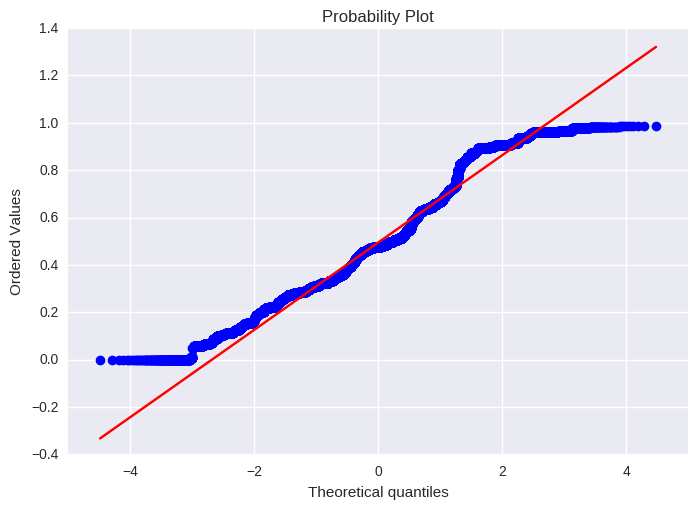

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
res = probplot(train.cont1,plot=ax)
plt.show()

0.5164199077605752
0.003913060664500326


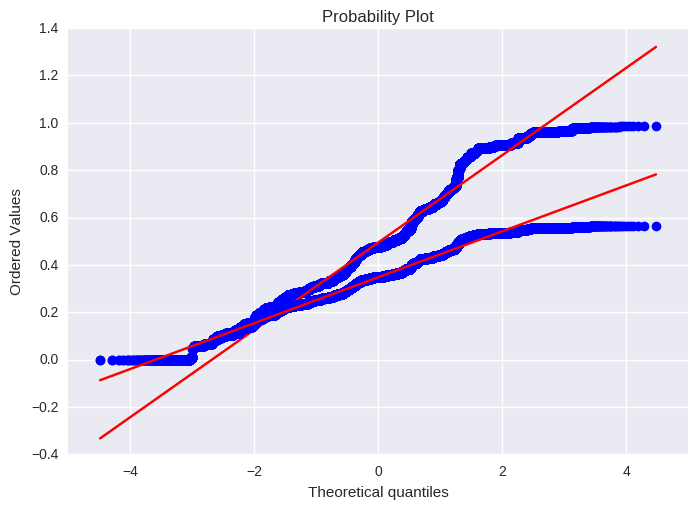

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
probplot(train.cont1,plot=ax)
print(skew(train.cont1))
f1 = boxcox(train.cont1+1)
print(skew(f1[0]))
ax = fig.add_subplot(111)
probplot(f1[0],plot=ax)
plt.show()

In [13]:
for col in ['cont'+str(x) for x in range(1,15)]:
    fig = plt.figure()
    #sns.lmplot(data=data,hue='binary',x=col,y='loss',fit_reg=False)
    sns.kdeplot(train[col])
    plt.savefig('plots/'+col+'_kde.png', bbox_inches='tight')
    plt.close(fig)

/home/jan/anaconda3/envs/kaggle/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


In [15]:
numeric_feats = ['cont'+str(x) for x in range(1,15)]
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats

cont1     0.516420
cont2    -0.310939
cont3    -0.010002
cont4     0.416093
cont5     0.681617
cont6     0.461211
cont7     0.826046
cont8     0.676629
cont9     1.072420
cont10    0.354998
cont11    0.280819
cont12    0.291990
cont13    0.380739
cont14    0.248672
dtype: float64

In [11]:
cats = []
for col in ['cat'+str(x)for x in range(1,117)]:
    cats.extend(data[col].values)
cats = pd.Series(cats).unique()

In [12]:
print(cats.shape)
cats.sort()
cats

(350,)


array(['A', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ',
       'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AQ', 'AR', 'AS', 'AT', 'AU',
       'AV', 'AW', 'AX', 'AY', 'B', 'BA', 'BB', 'BC', 'BD', 'BE', 'BF',
       'BG', 'BH', 'BI', 'BJ', 'BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BQ',
       'BR', 'BS', 'BT', 'BU', 'BV', 'BW', 'BX', 'BY', 'C', 'CA', 'CB',
       'CC', 'CD', 'CE', 'CF', 'CG', 'CH', 'CI', 'CJ', 'CK', 'CL', 'CM',
       'CN', 'CO', 'CP', 'CQ', 'CR', 'CS', 'CT', 'CU', 'CV', 'CW', 'CX',
       'CY', 'D', 'DA', 'DB', 'DC', 'DD', 'DE', 'DF', 'DG', 'DH', 'DI',
       'DJ', 'DK', 'DL', 'DM', 'DN', 'DO', 'DP', 'DQ', 'DR', 'DS', 'DT',
       'DU', 'DV', 'DW', 'DX', 'DY', 'E', 'EA', 'EB', 'EC', 'ED', 'EE',
       'EF', 'EG', 'EH', 'EI', 'EJ', 'EK', 'EL', 'EM', 'EN', 'EO', 'EP',
       'EQ', 'ER', 'ES', 'ET', 'EU', 'EV', 'EW', 'EX', 'EY', 'F', 'FA',
       'FB', 'FC', 'FD', 'FE', 'FF', 'FG', 'FH', 'FI', 'FJ', 'FK', 'FL',
       'FM', 'FN', 'FO', 'FP', 'FQ', 'FR', 'FS', 'FT', 'F

In [47]:
for col in ['cat'+str(x)for x in range(1,117)]:
    train = train.sort_values(col)
    tmp = train.groupby(col).loss.mean()
    fig = plt.figure()
    plt.plot(tmp.values,'ro')
    #sns.boxplot(y='loss',x=col,data=data)
    plt.xticks(rotation=90)
    #plt.yscale('log')
    plt.savefig('plots/'+col+'_sorted.png', bbox_inches='tight')
    plt.close(fig)
    

In [14]:
#distribution025 = pd.DataFrame(index=cats,columns=['cat'+str(x)for x in range(1,117)])
distribution05 = pd.DataFrame(index=cats,columns=['cat'+str(x)for x in range(1,117)])
#distribution075 = pd.DataFrame(index=cats,columns=['cat'+str(x)for x in range(1,117)])
for col in distribution05.columns:
    #quant = train.groupby(col).loss.quantile(q=0.25)
    #distribution025[col]=quant
    quant = train.groupby(col).loss.quantile(q=0.5)
    distribution05[col]=quant
    #quant = train.groupby(col).loss.quantile(q=0.75)
    #distribution075[col]=quant
#distribution025 = distribution025.set_index(distribution025.index.values+"025")
#distribution05 = distribution05.set_index(distribution05.index.values+"05")
#distribution075 = distribution075.set_index(distribution075.index.values+"075")
#distribution = distribution025.append(distribution05.append(distribution075))
distribution05.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
A,2458.69,1739.25,2033.38,1974.74,1947.07,2341.86,2073.635,2070.73,1778.855,1902.69,...,2003.69,2189.2,1839.025,2212.320,1974.74,1997.66,2236.90,2341.86,2003.69,NaN
AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1872.330,2120.810,NaN,2073.04,NaN,NaN,NaN,10712.380
AB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2048.220,1823.455,NaN,2319.27,934.10,NaN,NaN,1159.305
AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2567.850,NaN,1966.71,1594.78,NaN,NaN,2634.340
AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1729.475,NaN,2261.30,2191.53,NaN,NaN,1624.820


In [ ]:
sns.PairGrid(distribution05)
#plt.xticks(rotation=90)
plt.show()

In [16]:
#plot with logged loss
train.loss = np.log(train.loss)
for col in ['cat'+str(x)for x in range(1,117)]:
    fig = plt.figure()
    sns.boxplot(y='loss',x=col,data=train)
    plt.xticks(rotation=90)
    plt.savefig('plots/'+col+'_log_box.png', bbox_inches='tight')
    plt.close(fig)

In [55]:
outliers = pd.DataFrame(index=cats,columns=['cat'+str(x)for x in range(1,117)])
for col in outliers:
    group = train[[col,'loss']]
    Q1 = group.groupby(col).loss.apply(lambda x: np.nanpercentile(x,q=25))
    Q3 = group.groupby(col).loss.apply(lambda x: np.nanpercentile(x,q=75))
    IQR = Q3-Q1
    for categ in group[col].unique():
        outlier = ((group[group[col]==categ].loss < (Q1[categ] - 1.5 * IQR[categ])) | (group[group[col]==categ].loss > (Q3[categ] + 1.5 * IQR[categ]))).sum()
        outliers.loc[categ,col] = outlier
outliers.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
A,661,592,663,364,344,732,664,605,601,697,...,0,34,0,9,364,6,8,732,0,NaN
AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,NaN,5,NaN,NaN,NaN,1
AB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,109,0,NaN,2,1,NaN,NaN,0
AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6,NaN,3,0,NaN,NaN,0
AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9,NaN,4,31,NaN,NaN,0


In [60]:
outliers.describe().to_csv('outliers_summary.csv')

In [13]:
for col in train:
    print(col + ": "+ str(train[col].unique()))

id: [     1      2      5 ..., 587630 587632 587633]
cat1: ['A' 'B']
cat2: ['B' 'A']
cat3: ['A' 'B']
cat4: ['B' 'A']
cat5: ['A' 'B']
cat6: ['A' 'B']
cat7: ['A' 'B']
cat8: ['A' 'B']
cat9: ['B' 'A']
cat10: ['A' 'B']
cat11: ['B' 'A']
cat12: ['A' 'B']
cat13: ['A' 'B']
cat14: ['A' 'B']
cat15: ['A' 'B']
cat16: ['A' 'B']
cat17: ['A' 'B']
cat18: ['A' 'B']
cat19: ['A' 'B']
cat20: ['A' 'B']
cat21: ['A' 'B']
cat22: ['A' 'B']
cat23: ['B' 'A']
cat24: ['A' 'B']
cat25: ['A' 'B']
cat26: ['A' 'B']
cat27: ['A' 'B']
cat28: ['A' 'B']
cat29: ['A' 'B']
cat30: ['A' 'B']
cat31: ['A' 'B']
cat32: ['A' 'B']
cat33: ['A' 'B']
cat34: ['A' 'B']
cat35: ['A' 'B']
cat36: ['A' 'B']
cat37: ['A' 'B']
cat38: ['A' 'B']
cat39: ['A' 'B']
cat40: ['A' 'B']
cat41: ['A' 'B']
cat42: ['A' 'B']
cat43: ['A' 'B']
cat44: ['A' 'B']
cat45: ['A' 'B']
cat46: ['A' 'B']
cat47: ['A' 'B']
cat48: ['A' 'B']
cat49: ['A' 'B']
cat50: ['A' 'B']
cat51: ['A' 'B']
cat52: ['A' 'B']
cat53: ['A' 'B']
cat54: ['A' 'B']
cat55: ['A' 'B']
cat56: ['A' 'B']
cat5

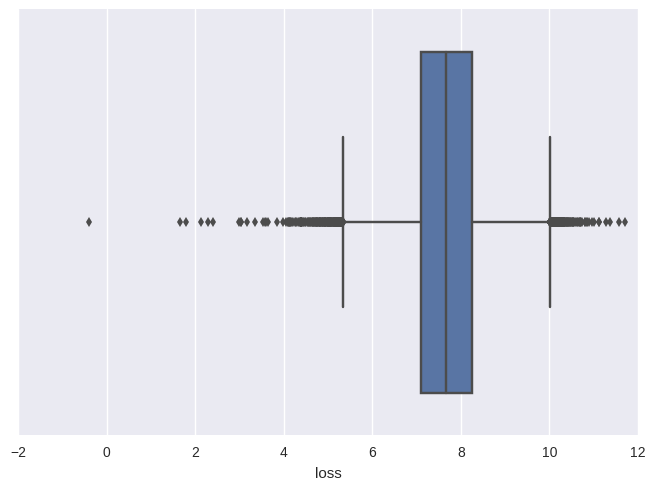

In [30]:
sns.boxplot(train.loss)
plt.show()

In [40]:
(train.loss < train.loss.quantile(0.75)).sum()

141238

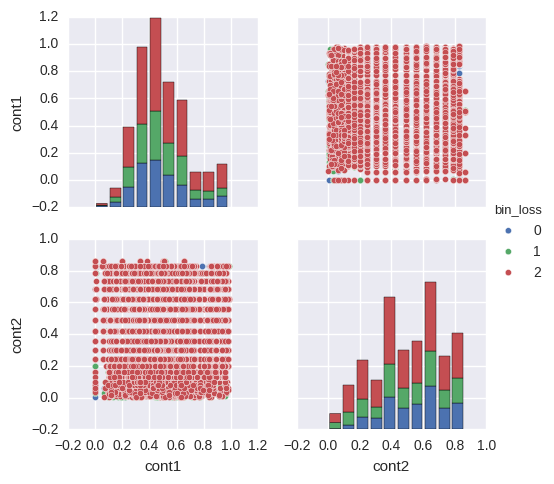

In [44]:
train['bin_loss'] = 1
train.loc[train.loss < train.loss.quantile(0.25),'bin_loss'] = 0
train.loc[train.loss > train.loss.quantile(0.75),'bin_loss'] = 2
sns.pairplot(train,vars=["cont"+str(x)for x in range(1,3)],hue='bin_loss')
plt.show()

In [59]:
train.corr()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,bin_loss
id,1.000000,0.002130,0.000783,0.000816,0.002578,0.000775,0.001426,0.002209,0.005534,0.001870,0.002582,0.001075,0.000889,0.000442,-0.004924,-0.000022,0.002702
cont1,0.002130,1.000000,-0.085180,-0.445431,0.367549,-0.025230,0.758315,0.367384,0.361163,0.929912,0.808551,0.596090,0.614225,0.534850,0.056688,-0.007325,0.037909
cont2,0.000783,-0.085180,1.000000,0.455861,0.038693,0.191427,0.015864,0.048187,0.137468,-0.032729,0.063526,0.116824,0.106250,0.023335,-0.045584,0.104627,-0.104730
cont3,0.000816,-0.445431,0.455861,1.000000,-0.341633,0.089417,-0.349278,0.097516,-0.185432,-0.417054,-0.325562,0.025271,0.006111,-0.418203,-0.039592,0.081518,-0.082892
cont4,0.002578,0.367549,0.038693,-0.341633,1.000000,0.163748,0.220932,-0.115064,0.528740,0.328961,0.283294,0.120927,0.130453,0.179342,0.017445,-0.027521,0.031741
cont5,0.000775,-0.025230,0.191427,0.089417,0.163748,1.000000,-0.149810,-0.249344,0.009015,-0.088202,-0.064967,-0.151548,-0.148217,-0.082915,-0.021638,-0.014962,-0.013845
cont6,0.001426,0.758315,0.015864,-0.349278,0.220932,-0.149810,1.000000,0.658918,0.437437,0.797544,0.883351,0.773745,0.785144,0.815091,0.042178,0.031509,0.010667
cont7,0.002209,0.367384,0.048187,0.097516,-0.115064,-0.249344,0.658918,1.000000,0.142042,0.384343,0.492621,0.747108,0.742712,0.288395,0.022286,0.085073,-0.040166
cont8,0.005534,0.361163,0.137468,-0.185432,0.528740,0.009015,0.437437,0.142042,1.000000,0.452658,0.336588,0.302381,0.315904,0.476402,0.043539,0.032028,-0.003016
cont9,0.001870,0.929912,-0.032729,-0.417054,0.328961,-0.088202,0.797544,0.384343,0.452658,1.000000,0.785697,0.608000,0.626656,0.642028,0.074154,0.017422,0.025376


correlation with >0.8: cont1 - cont9, cont1 - cont10, cont6 - cont10, cont6 - cont13, cont11 - cont12

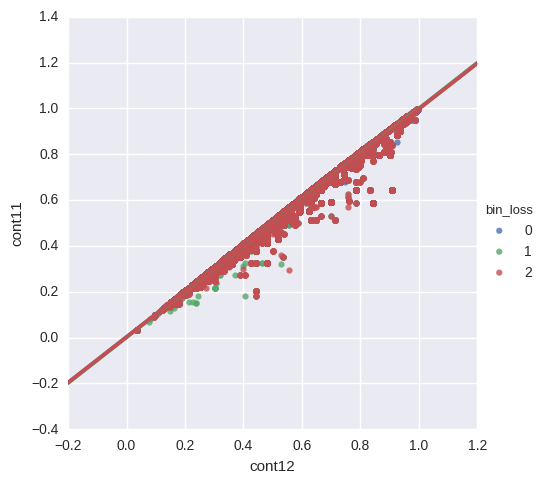

In [70]:
sns.lmplot(x='cont12',y='cont11',data=train,hue='bin_loss')
plt.show()

In [72]:
train.cont12/train.cont11

0         1.043706
1         1.082749
2         0.979093
3         0.980650
4         0.987913
5         0.979446
6         1.052036
7         1.220016
8         0.980534
9         1.018881
10        0.978101
11        1.033588
12        0.980650
13        0.984040
14        0.989258
15        0.979012
16        0.978001
17        0.980440
18        0.980440
19        1.044508
20        0.979175
21        1.003024
22        0.991762
23        1.082749
24        0.985486
25        0.978212
26        0.978101
27        1.014612
28        0.978841
29        0.979175
            ...   
188288    0.977953
188289    0.979111
188290    0.979111
188291    1.009965
188292    0.978255
188293    1.011191
188294    0.987690
188295    0.977867
188296    0.980074
188297    1.030586
188298    0.979845
188299    0.977915
188300    0.982505
188301    1.050709
188302    0.982990
188303    1.019943
188304    0.981226
188305    0.978841
188306    1.008410
188307    0.997360
188308    0.987690
188309    1.

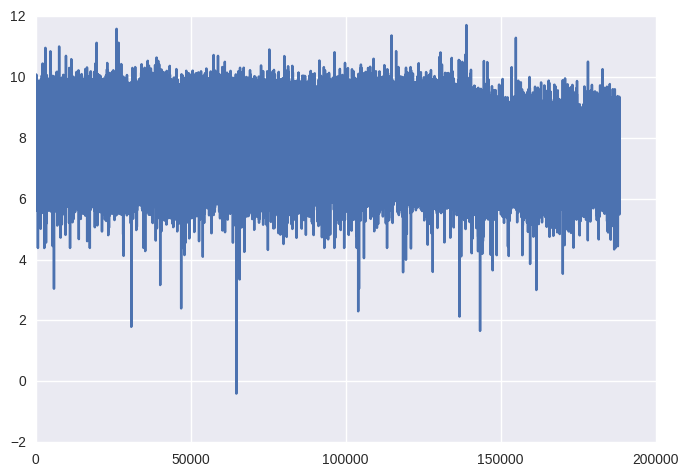

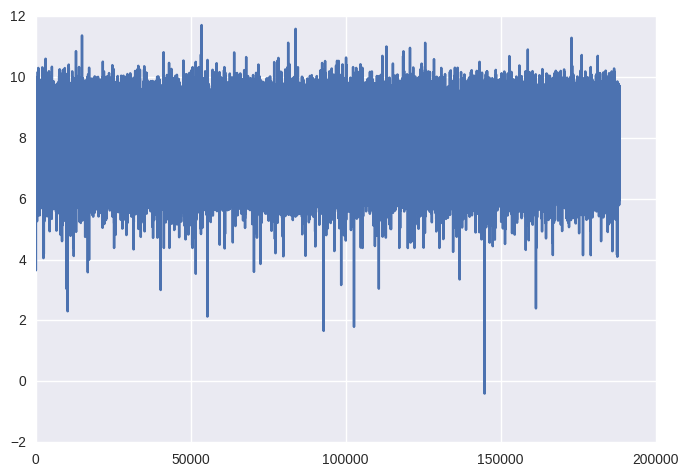

In [44]:
train = train.sort_values('cat1')
train.
plt.plot(train.loss.values)
plt.show()
train = train.sort_values('id')
plt.plot(train.loss.values)
plt.show()

In [13]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,7.702186
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,7.157424
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,8.008063
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,6.845720
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,7.924380


In [38]:
d = {}
for col in ['cat'+str(x)for x in range(1,117)]:
    d[col]=len(data[col].unique())

In [42]:
df = pd.DataFrame.from_dict(d, orient='index')
df = df.reset_index()
df.sort_values([0,'index'])

,index,0
84,cat1,2
17,cat10,2
29,cat11,2
20,cat12,2
47,cat13,2
98,cat14,2
19,cat15,2
38,cat16,2
110,cat17,2
6,cat18,2


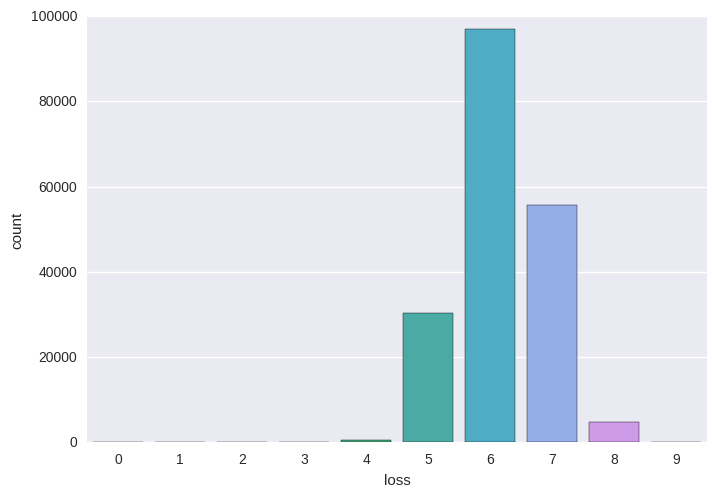

In [56]:
bins = pd.cut(train.loss,10,labels=False)
sns.countplot(bins)
plt.show()

In [64]:
outliers = train[np.logical_or(bins>8,bins<5)]
outliers.head(10)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
89,318,B,A,A,A,A,B,A,A,A,...,0.326207,0.365369,0.36083,0.39849,0.39599,0.492200,0.481306,0.339244,0.303323,3.648057
462,1460,A,A,A,A,A,B,A,A,A,...,0.611356,0.414271,0.63475,0.79734,0.64056,0.607500,0.612906,0.738850,0.740091,5.415567
470,1495,A,A,B,A,A,A,A,B,A,...,0.347748,0.233689,0.48864,0.71422,0.26029,0.187481,0.185520,0.476684,0.286416,5.260408
1289,4197,B,A,A,A,B,A,A,A,A,...,0.331919,0.336160,0.36083,0.39849,0.39599,0.297750,0.301921,0.351299,0.312933,5.451682
2535,8104,A,A,A,A,A,A,A,A,A,...,0.463958,0.730767,0.37194,0.44352,0.45017,0.705501,0.714544,0.293178,0.297713,4.048126
2657,8541,B,A,A,A,A,B,A,A,A,...,0.684149,0.461610,0.61795,0.38249,0.51111,0.682315,0.669033,0.756454,0.283363,4.189200
2782,8899,A,A,A,B,A,A,A,A,A,...,0.745129,0.418229,0.89618,0.76431,0.80218,0.550529,0.561143,0.808455,0.685735,5.251016
3159,10149,A,A,A,A,B,A,A,A,A,...,0.398862,0.324264,0.53642,0.42700,0.52221,0.260140,0.270746,0.287682,0.290335,5.593037
3225,10322,A,B,B,B,B,A,A,A,B,...,0.520041,0.999998,0.27320,0.41471,0.56627,0.973899,0.970623,0.151871,0.384281,10.597064
3736,11932,A,A,A,A,A,B,A,A,A,...,0.539083,0.418349,0.52450,0.64873,0.71775,0.377724,0.369858,0.678452,0.687013,5.420048


In [86]:
merge = {}
for col in ['cat'+str(x)for x in range(1,117)]:
    ct = pd.crosstab(index=data[col],columns="count")/data.shape[0]
    if((ct<0.05).any().any()):
        for cat in itertools.combinations(data[col].unique(),2):
            pval = stats.ttest_ind(data[data[col]==cat[0]].loss,data[data[col]==cat[1]].loss)[1]
            if pval >=0.05:
                merge[col] = cat

/home/jan/anaconda3/envs/kaggle/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/home/jan/anaconda3/envs/kaggle/lib/python3.5/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [87]:
merge

{'cat100': ('O', 'E'),
 'cat101': ('H', 'K'),
 'cat102': ('E', 'F'),
 'cat103': ('L', 'N'),
 'cat104': ('A', 'Q'),
 'cat105': ('R', 'B'),
 'cat106': ('B', 'P'),
 'cat107': ('R', 'B'),
 'cat108': ('H', 'J'),
 'cat109': ('CG', 'ZZ'),
 'cat110': ('AF', 'S'),
 'cat111': ('B', 'D'),
 'cat112': ('V', 'AB'),
 'cat113': ('AR', 'P'),
 'cat114': ('S', 'G'),
 'cat115': ('X', 'B'),
 'cat116': ('MH', 'BB'),
 'cat15': ('A', 'B'),
 'cat70': ('A', 'B'),
 'cat73': ('A', 'C'),
 'cat74': ('B', 'C'),
 'cat75': ('A', 'C'),
 'cat77': ('C', 'A'),
 'cat81': ('D', 'A'),
 'cat82': ('A', 'C'),
 'cat83': ('A', 'C'),
 'cat85': ('D', 'C'),
 'cat86': ('D', 'B'),
 'cat87': ('B', 'A'),
 'cat88': ('E', 'B'),
 'cat89': ('G', 'F'),
 'cat90': ('E', 'G'),
 'cat91': ('F', 'H'),
 'cat92': ('I', 'E'),
 'cat93': ('D', 'B'),
 'cat94': ('A', 'G'),
 'cat96': ('I', 'C'),
 'cat97': ('F', 'B'),
 'cat98': ('D', 'A'),
 'cat99': ('G', 'O')}

In [89]:
pd.DataFrame.from_dict(merge,orient='index').to_csv('mergable_categories.csv')

In [14]:
np.sort(np.unique(train_test.lin_cont9))

array([  0,  34,  52,  96, 111, 116, 117, 118, 123, 127, 128, 129, 134,
       138, 139, 146, 147, 148, 150, 151, 152, 154, 155, 156, 158, 161,
       162, 163, 166, 170, 172, 173, 175, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
       197, 198, 199, 202, 204, 205, 206, 208, 209, 210, 211, 212, 213,
       214, 216, 218, 220, 221, 222, 225, 226, 227, 228, 230, 231, 232,
       233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 246,
       247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259,
       261, 262, 263, 264, 265, 266, 267, 269, 270, 271, 272, 273, 274,
       275, 277, 278, 279, 280, 281, 282, 283, 285, 286, 287, 288, 289,
       291, 292, 293, 294, 295, 296, 297, 299, 300, 301, 302, 303, 304,
       305, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318,
       319, 320, 321, 322, 323, 324, 326, 327, 328, 329, 330, 331, 332,
       334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 34